In [ ]:
import pandas as pd
import glob
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#ge all files and add column to define the country of each file
files = [i for i in glob.glob('archive/*.{}'.format('csv'))]
dfs = list()
for csv in files:
    df = pd.read_csv(csv)
    df['country'] = csv[8:10]
    dfs.append(df)

df2 = pd.concat(dfs)

In [ ]:
df = df2.copy()

## Data Exploration

In [ ]:
#Display first 5 rows in our data
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR


In [ ]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country'],
      dtype='object')

In [ ]:
#Display sum of null values in each column
df.isnull().sum()

video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          47519
country                  0
dtype: int64

In [ ]:
#Number of rows and number of columns
df.shape

(1361320, 17)

In [ ]:
df.tags.value_counts()

[None]                                                                                                                                                                                                                                                                                                                                                                                                                                                         217724
방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jhope|지민|JIMIN|정국|JUNGKOOK|JIN                                                                                                                                                                                                                                                                                                                                                                                        1717
BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄                                                             

In [ ]:
len(df[df.tags=="[None]"])

217724

In [ ]:
#Replacing all "[None]" values in column tags with null
df['tags'] = df['tags'].apply(lambda x : np.nan if x == "[None]" else x)

In [ ]:
df.isnull().sum()

video_id                  0
title                     0
publishedAt               0
channelId                 0
channelTitle              1
categoryId                0
trending_date             0
tags                 217724
view_count                0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
description           47519
country                   0
dtype: int64

<AxesSubplot:>

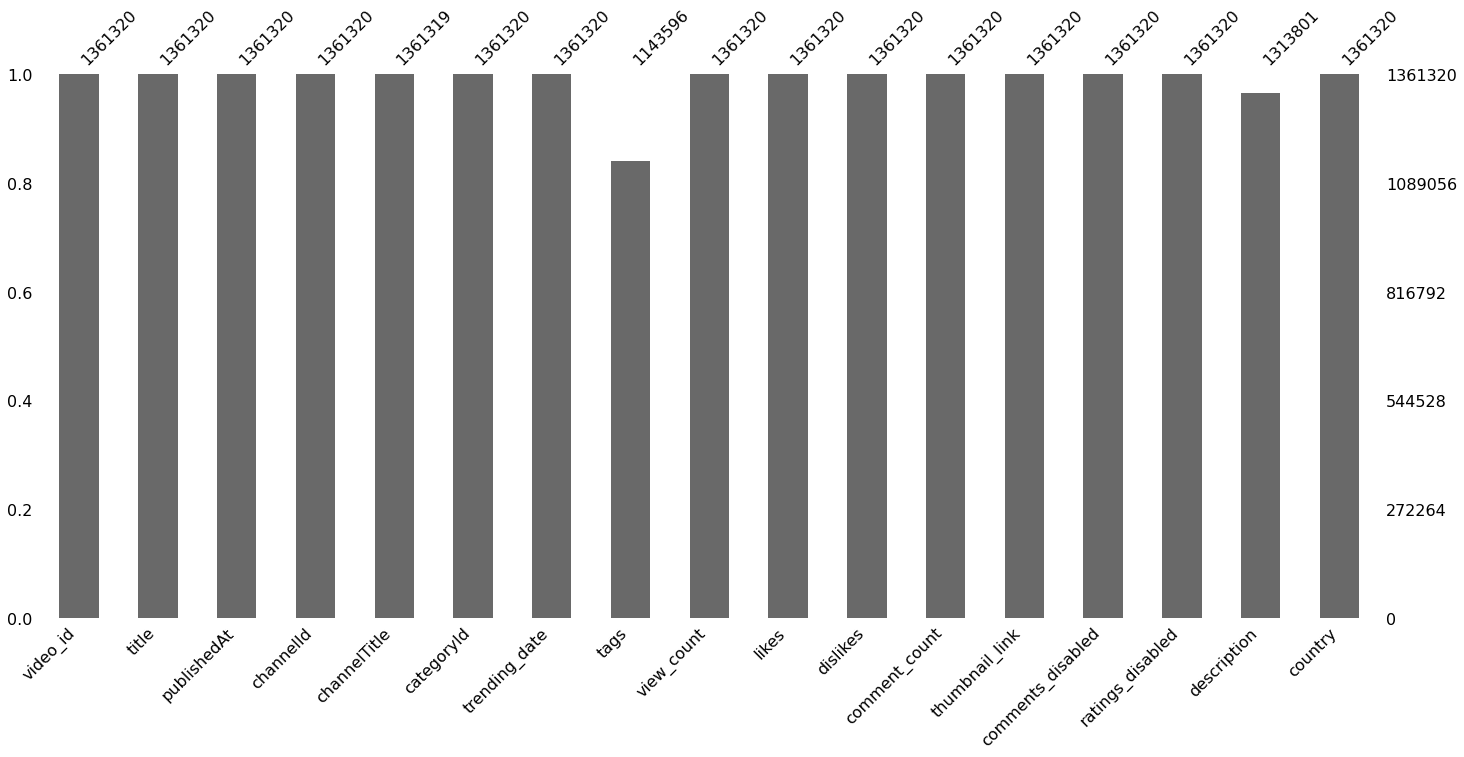

In [ ]:
msno.bar(df)

<AxesSubplot:>

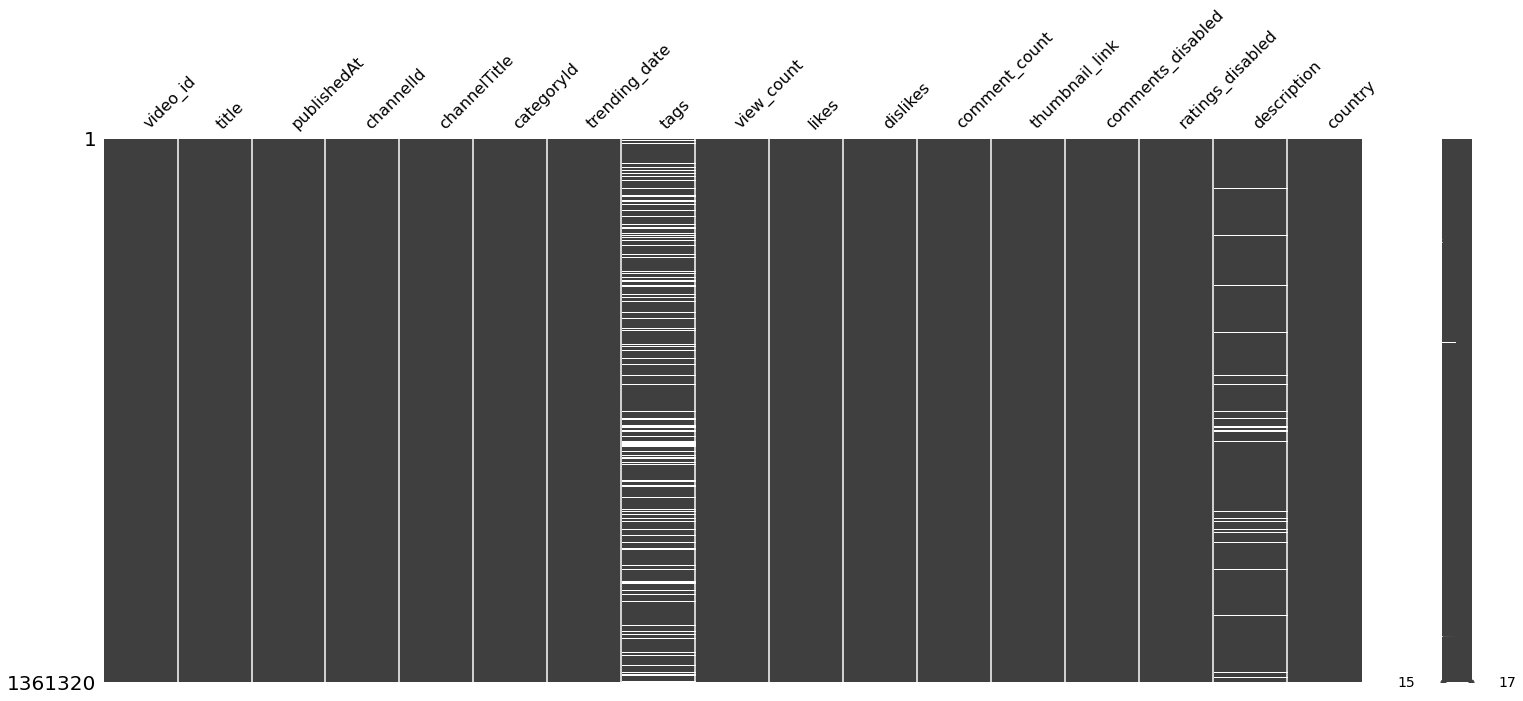

In [ ]:
msno.matrix(df)

In [ ]:
# you can also count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False).head(3)

,Total missing,% missing
tags,217724,15.993594
description,47519,3.490656
channelTitle,1,0.000073


In [ ]:
#Fill missing value in channelTitle column

In [ ]:
df[df.channelTitle.isnull()]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
30289,9b9MovPPewk,Kala Official Teaser | Tovino Thomas | Rohith ...,2021-01-21T12:30:29Z,UCDQt0y-FCJLRdwhNLutPFZA,NaN,22,2021-01-23T00:00:00Z,Kala|Kala trailer|kala teaser|kala tovino thom...,1008638,72772,1451,3023,https://i.ytimg.com/vi/9b9MovPPewk/default.jpg,False,False,Presenting Official Trailer Of Kala Directed B...,IN


In [ ]:
#We can use channel id column to fill this missing value
#As we can get rows with the same channel id value and of course it will have the same value of channelTitle

In [ ]:
df[df.channelId=='UCDQt0y-FCJLRdwhNLutPFZA'].head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
30089,9b9MovPPewk,Kala Official Teaser | Tovino Thomas | Rohith ...,2021-01-21T12:30:29Z,UCDQt0y-FCJLRdwhNLutPFZA,Juvis Productions,22,2021-01-22T00:00:00Z,Kala|Kala trailer|kala teaser|kala tovino thom...,735800,62517,1039,2561,https://i.ytimg.com/vi/9b9MovPPewk/default.jpg,False,False,Presenting Official Trailer Of Kala Directed B...,IN
30289,9b9MovPPewk,Kala Official Teaser | Tovino Thomas | Rohith ...,2021-01-21T12:30:29Z,UCDQt0y-FCJLRdwhNLutPFZA,NaN,22,2021-01-23T00:00:00Z,Kala|Kala trailer|kala teaser|kala tovino thom...,1008638,72772,1451,3023,https://i.ytimg.com/vi/9b9MovPPewk/default.jpg,False,False,Presenting Official Trailer Of Kala Directed B...,IN
30486,9b9MovPPewk,Kala Official Teaser | Tovino Thomas | Rohith ...,2021-01-21T12:30:29Z,UCDQt0y-FCJLRdwhNLutPFZA,Juvis Productions,22,2021-01-24T00:00:00Z,Kala|Kala trailer|kala teaser|kala tovino thom...,1262849,78255,1792,3216,https://i.ytimg.com/vi/9b9MovPPewk/default.jpg,False,False,Presenting Official Trailer Of Kala Directed B...,IN


In [ ]:
df['channelTitle'].fillna('Juvis Productions',inplace=True)

In [ ]:
df[df.description.isnull()].tags.isnull().sum()

39628

In [ ]:
#Most of null values in description column have have null values in tags column
#So we can delete rows with description null value as it mising percentage is just 3.5% but not now
#because we may not use those columns in our model

In [ ]:
#Display the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1361320 entries, 0 to 124789
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   video_id           1361320 non-null  object
 1   title              1361320 non-null  object
 2   publishedAt        1361320 non-null  object
 3   channelId          1361320 non-null  object
 4   channelTitle       1361320 non-null  object
 5   categoryId         1361320 non-null  int64 
 6   trending_date      1361320 non-null  object
 7   tags               1143596 non-null  object
 8   view_count         1361320 non-null  int64 
 9   likes              1361320 non-null  int64 
 10  dislikes           1361320 non-null  int64 
 11  comment_count      1361320 non-null  int64 
 12  thumbnail_link     1361320 non-null  object
 13  comments_disabled  1361320 non-null  bool  
 14  ratings_disabled   1361320 non-null  bool  
 15  description        1313801 non-null  object
 16  c

In [ ]:
#publishedAt column shoud't be object it should be DateTime
#So i will convert it to DataTime

In [ ]:
df['publishedAt'].unique()

array(['2020-08-11T22:21:49Z', '2020-08-11T15:00:13Z',
       '2020-08-10T14:59:00Z', ..., '2022-04-21T19:00:12Z',
       '2022-04-21T19:43:04Z', '2022-04-21T04:30:34Z'], dtype=object)

In [ ]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%f')
df['publishedAt'].head()

0   2020-08-11 22:21:49+00:00
1   2020-08-11 15:00:13+00:00
2   2020-08-10 14:59:00+00:00
3   2020-08-11 15:00:09+00:00
4   2020-08-11 20:04:02+00:00
Name: publishedAt, dtype: datetime64[ns, UTC]

In [ ]:
#categoryId column shoud't be Integer as we will not need to do any calculations on it
#So we will convert it to String
df['categoryId'] = df['categoryId'].astype(str)

In [ ]:
#trending_date column shoud't be object it should be DateTime
#So i will convert it to DataTime

In [ ]:
df['trending_date']= df['trending_date'].apply(lambda x :x[0:10])
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%d')

In [ ]:
df['trending_date'].value_counts()

2021-03-02    4398
2021-06-14    4346
2021-06-13    4342
2021-06-12    4339
2021-05-31    4336
              ... 
2020-08-14    2106
2020-08-12    2105
2021-01-30    2104
2020-11-03    2050
2020-08-22    1938
Name: trending_date, Length: 604, dtype: int64

In [ ]:
#Display the datatype of each column again to know that everything is ok

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1361320 entries, 0 to 124789
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   video_id           1361320 non-null  object             
 1   title              1361320 non-null  object             
 2   publishedAt        1361320 non-null  datetime64[ns, UTC]
 3   channelId          1361320 non-null  object             
 4   channelTitle       1361320 non-null  object             
 5   categoryId         1361320 non-null  object             
 6   trending_date      1361320 non-null  datetime64[ns]     
 7   tags               1143596 non-null  object             
 8   view_count         1361320 non-null  int64              
 9   likes              1361320 non-null  int64              
 10  dislikes           1361320 non-null  int64              
 11  comment_count      1361320 non-null  int64              
 12  thumbnail_link 

In [ ]:
#Check fo duplicates in our data

In [ ]:
df.duplicated().sum()

1223

In [ ]:
#Describtion of numerical columns
#Now, let's see some statistical information about the numerical columns of our dataset

In [ ]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,view_count,likes,dislikes,comment_count
count,1361320.00,1361320.00,1361320.00,1361320.00
mean,1898829.51,109435.65,1974.75,9004.83
std,5959854.71,382632.28,32427.66,88864.67
min,0.00,0.00,0.00,0.00
25%,245047.00,8608.00,42.00,531.00
50%,594924.50,25115.50,275.00,1469.00
75%,1517902.25,78223.00,1014.00,4283.00
max,296314174.00,16464253.00,12341474.00,6939302.00


In [ ]:
#Describtion of categorical columns

In [ ]:
df.describe(include = ['O'])

,video_id,title,channelId,channelTitle,categoryId,tags,thumbnail_link,description,country
count,1361320,1361320,1361320,1361320,1361320,1143596,1361320,1313801,1361320
unique,251353,255081,33678,34714,15,172757,251362,236040,11
top,2IkoKhr6Tss,Starlink Mission,UC3IZKseVpdzPSBaWxBxundA,BANGTANTV,24,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,https://i.ytimg.com/vi/2IkoKhr6Tss/default.jpg,#shorts,GB
freq,151,409,3110,3098,355522,1717,151,2017,124794


In [ ]:
#Q: which years the dataset was collected ?

In [ ]:
df['year'] = pd.DatetimeIndex(df['trending_date']).year

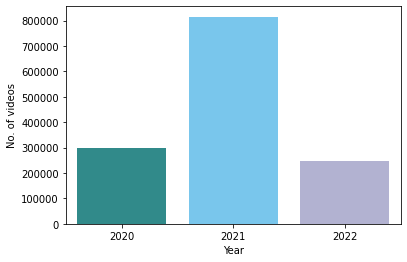

In [ ]:
cdf = df["year"].value_counts().to_frame().reset_index().rename(columns={"index": "year", "year": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf,
                palette=sns.color_palette(['#229999', '#66ccff','#adadd6']), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")
plt.savefig('No of videos per year')

In [ ]:
 df["year"].value_counts(normalize=True)

2021   0.60
2020   0.22
2022   0.18
Name: year, dtype: float64

In [ ]:
df.describe()

,view_count,likes,dislikes,comment_count,year
count,1361320.00,1361320.00,1361320.00,1361320.00,1361320.00
mean,1898829.51,109435.65,1974.75,9004.83,2020.96
std,5959854.71,382632.28,32427.66,88864.67,0.63
min,0.00,0.00,0.00,0.00,2020.00
25%,245047.00,8608.00,42.00,531.00,2021.00
50%,594924.50,25115.50,275.00,1469.00,2021.00
75%,1517902.25,78223.00,1014.00,4283.00,2021.00
max,296314174.00,16464253.00,12341474.00,6939302.00,2022.00


In [ ]:
df.country.unique()

array(['BR', 'CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU', 'US'],
      dtype=object)

In [ ]:
import json
def add_category_col_for_each_country(country_name):
    country_file = 'archive/{}_category_id.json'.format(country_name)
    f = open(country_file)
    data = json.load(f)
    f.close()
    categoryId = []
    category=[]
    for item in data['items']:
        categoryId.append(item['id'])
        category.append( item['snippet']['title'] )

    df2 = pd.DataFrame(list(zip(category,categoryId)), columns =['category','categoryId'])

    return( pd.merge(df[df['country']== country_name],df2,on='categoryId',how='left'))

In [ ]:
df_br = add_category_col_for_each_country('BR')
df_ca = add_category_col_for_each_country('CA')
df_de = add_category_col_for_each_country('DE')
df_fr = add_category_col_for_each_country('FR')
df_gb = add_category_col_for_each_country('GB')
df_in = add_category_col_for_each_country('IN')
df_jp = add_category_col_for_each_country('JP')
df_kr = add_category_col_for_each_country('KR')
df_mx = add_category_col_for_each_country('MX')
df_ru = add_category_col_for_each_country('RU')
df_us = add_category_col_for_each_country('US')

In [ ]:
df = pd.concat([df_br,df_ca,df_de,df_fr,df_gb,df_in,df_jp,df_kr,df_mx,df_ru,df_us], axis=0)

In [ ]:
# Users like videos from which CATEGORY the most?
def plot_most_common_category(df , country_name):
    cat_df = df['category'].value_counts().reset_index()
    plt.figure(figsize=(8,5))
    ax = sns.barplot(y=cat_df['index'],x=cat_df['category'], data=cat_df,orient='h',palette='coolwarm')
    plt.xlabel("Number of Videos")
    plt.ylabel("Categories")
    plt.title("Catogories of trend videos in "+country_name)
    plt.savefig("Catogories of trend videos in "+country_name)

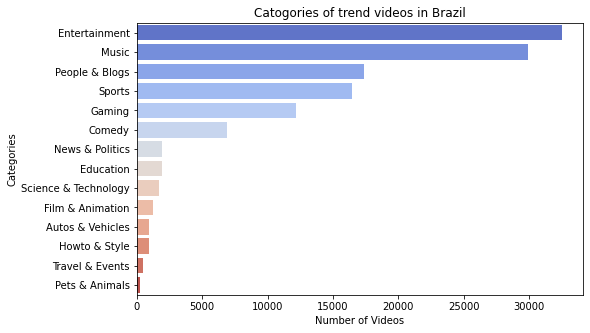

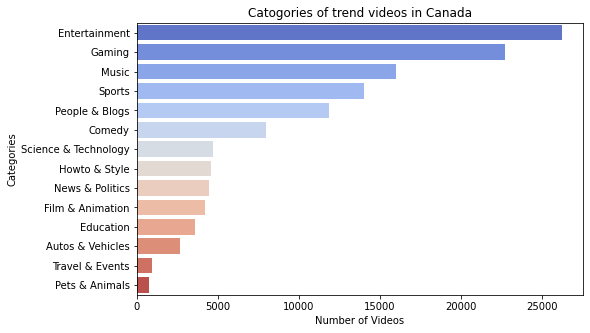

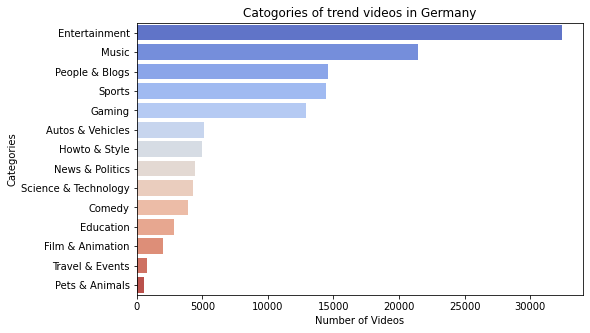

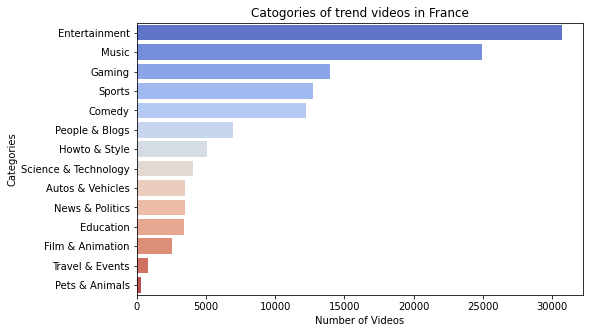

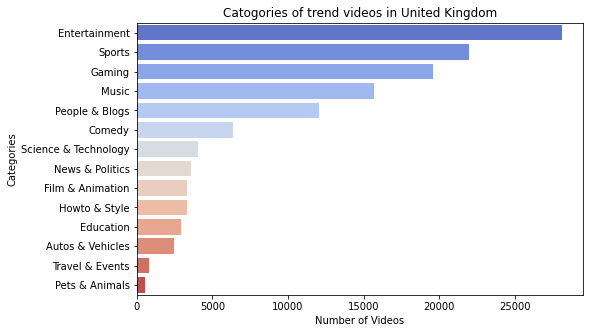

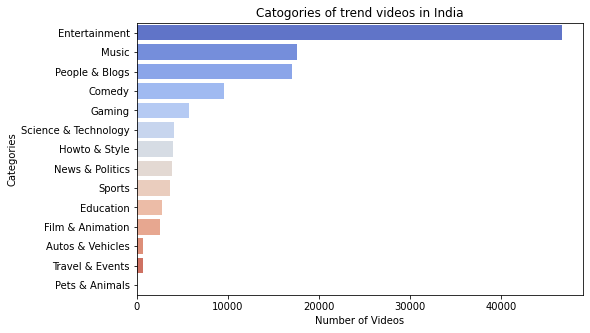

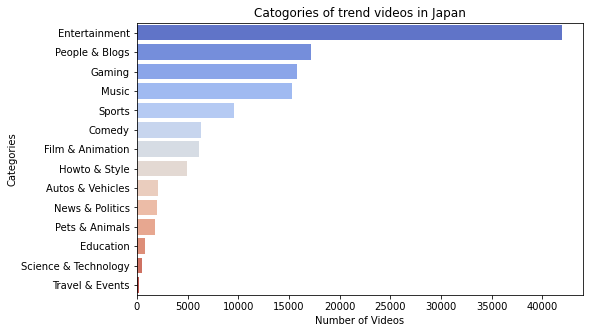

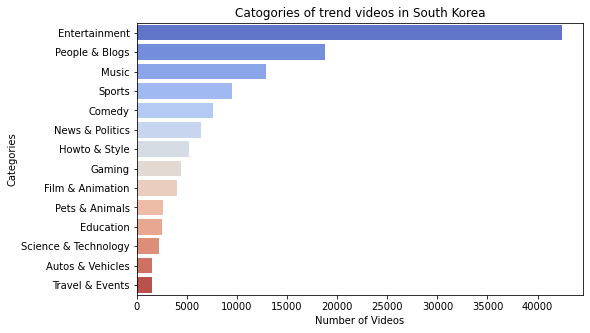

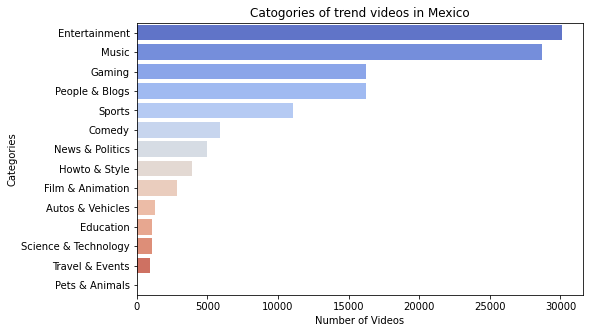

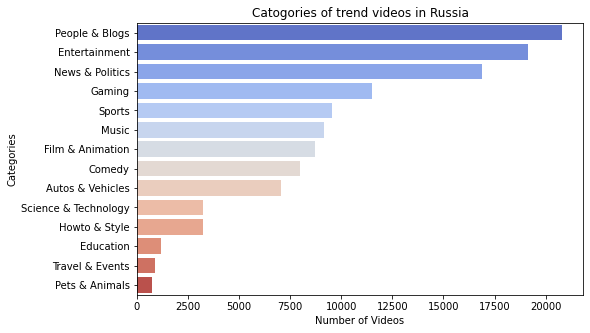

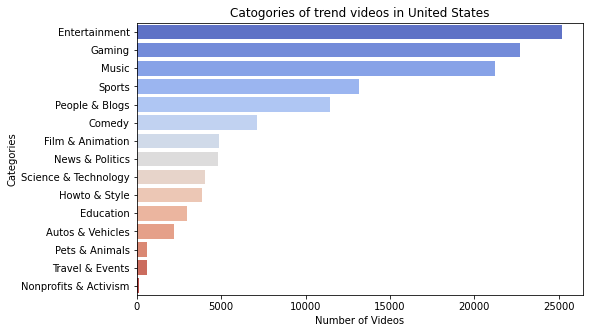

In [ ]:
plot_most_common_category(df_br,'Brazil')
plot_most_common_category(df_ca,'Canada')
plot_most_common_category(df_de,'Germany')
plot_most_common_category(df_fr,'France')
plot_most_common_category(df_gb,'United Kingdom')
plot_most_common_category(df_in,'India')
plot_most_common_category(df_jp,'Japan')
plot_most_common_category(df_kr,'South Korea')
plot_most_common_category(df_mx,'Mexico')
plot_most_common_category(df_ru,'Russia')
plot_most_common_category(df_us,'United States')

In [ ]:
#Q:How many trending videos have their commets disabled?

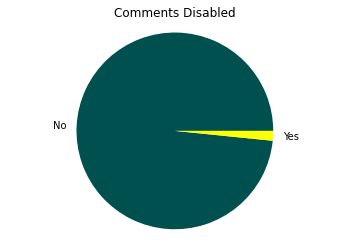

In [ ]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#005050', '#ffff00'], textprops={'color': '#020202'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled')
plt.savefig('Comments Disabled')

In [ ]:
df["comments_disabled"].value_counts(normalize=True)

False   0.98
True    0.02
Name: comments_disabled, dtype: float64

In [ ]:
#Q:How many trending videos have their ratings disabled?

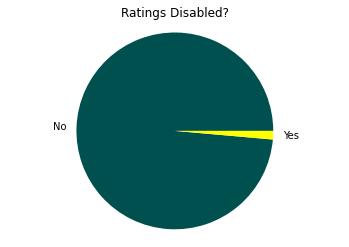

In [ ]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
            colors=['#005050', '#ffff00'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')
plt.savefig('Ratings Disabled')

In [ ]:
df["ratings_disabled"].value_counts(normalize=True)

False   0.99
True    0.01
Name: ratings_disabled, dtype: float64

In [ ]:
#Q:which days of the week had the largest numbers of trending videos?

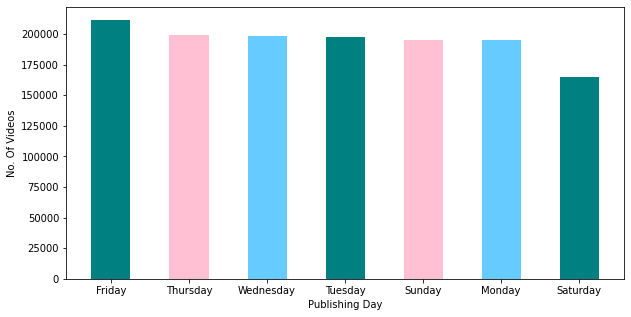

In [ ]:
day=df['publishedAt'].dt.day_name()
my_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Publishing Day','No. Of Videos'])
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Day'],count['No. Of Videos'],color=['#008080', '#ffc0d4', '#66ccff'],width=0.5)
plt.xlabel("Publishing Day")
plt.ylabel("No. Of Videos")
plt.savefig("Publishing Day")

In [ ]:
#Q:which publishing hours have the largest number of trending videos?

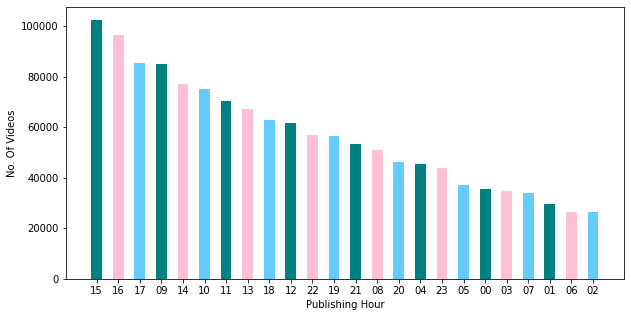

In [ ]:
hour=df.publishedAt.apply(lambda x: x.strftime("%H"))
my_dict=(hour.value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Publishing Hour','No. Of Videos'])
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No. Of Videos'],color=['#008080', '#ffc0d4', '#66ccff'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No. Of Videos")
plt.savefig("Publishing Hour")

In [ ]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country', 'year', 'category'],
      dtype='object')

<AxesSubplot:xlabel='comment_count', ylabel='view_count'>

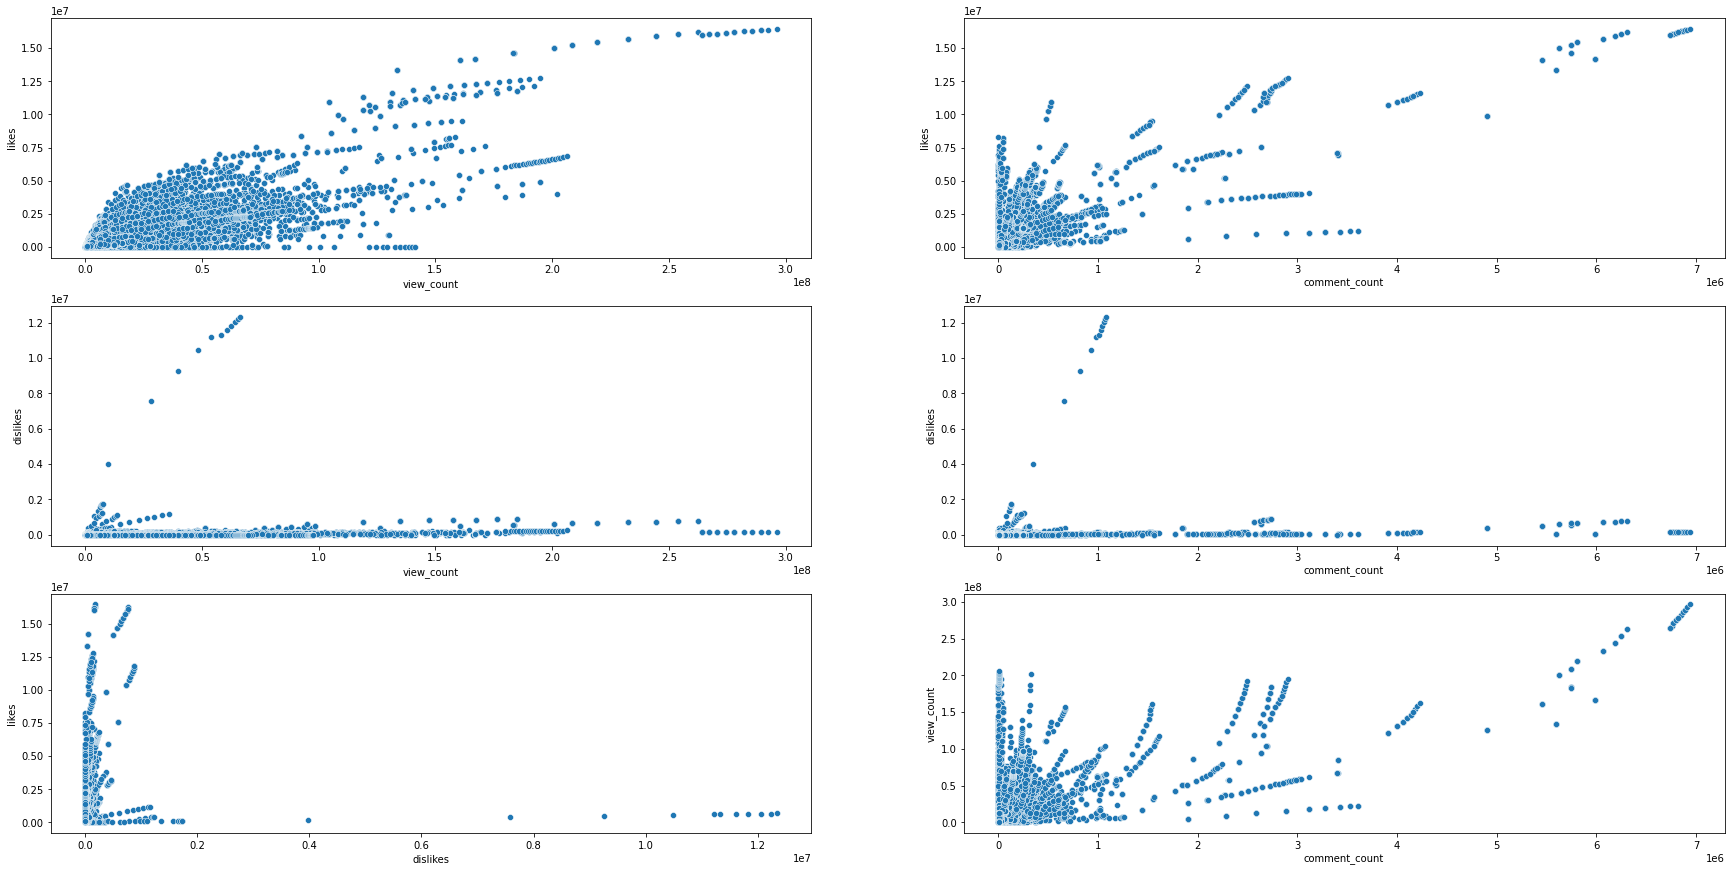

In [ ]:
f,ax=plt.subplots(3,2,figsize=(30,15))

sns.scatterplot(x='view_count',y='likes', data=df, ax=ax[0][0])
sns.scatterplot(x='view_count',y='dislikes', data=df, ax=ax[1][0])

sns.scatterplot(x='comment_count',y='likes', data=df, ax=ax[0][1])
sns.scatterplot(x='comment_count',y='dislikes', data=df, ax=ax[1][1])

sns.scatterplot(x='dislikes',y='likes', data=df, ax=ax[2][0])
sns.scatterplot(x='comment_count',y='view_count', data=df, ax=ax[2][1])

1. High Positive correlation:
    * View count and likes
    * likes and comment count

2. Moderate Positive correlation:
    * view count and comment count

3. Low correlation:
    * likes and dislikes
    * View count and dislikes
    * dislikes and comment count

In [ ]:
#Q: Which channels have the most number of videos?

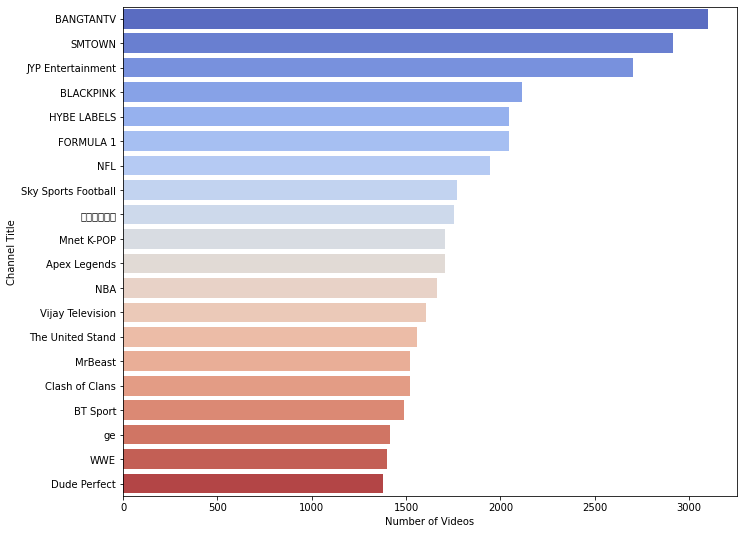

In [ ]:
cat_df = df['channelTitle'].value_counts().reset_index().head(20)
plt.figure(figsize=(11,9))
ax = sns.barplot(y=cat_df['index'],x=cat_df['channelTitle'], data=cat_df,orient='h',palette='coolwarm')
plt.xlabel("Number of Videos")
plt.ylabel("Channel Title")
plt.savefig("Channel Title")

In [ ]:
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year,category
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49+00:00,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,2020,People & Blogs
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13+00:00,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020,Music
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10 14:59:00+00:00,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,2020,People & Blogs
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11 15:00:09+00:00,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR,2020,Gaming
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11 20:04:02+00:00,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR,2020,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124785,ga2QQ99thok,THOR: LOVE AND THUNDER TRAILER REACTION!! Marv...,2022-04-18 16:22:42+00:00,UC7_WiJnJxpm4MRNesRttzWg,The Reel Rejects,24,2022-04-23,reel rejects|thor|thor love and thunder|thor l...,394264,24304,0,1065,https://i.ytimg.com/vi/ga2QQ99thok/default.jpg,False,False,THOR 4 TEASER TRAILER!! Mighty Thor (Jane Fost...,US,2022,Entertainment
124786,FprgxgVuZaE,Attempting to eat 200 HOT TAMALE Peeps... (Hap...,2022-04-17 23:20:42+00:00,UCd1fLoVFooPeWqCEYVUJZqg,Matt Stonie,24,2022-04-23,Matt Stonie|Megatoad|Competitive Eating|Food C...,2028616,84949,0,3878,https://i.ytimg.com/vi/FprgxgVuZaE/default.jpg,False,False,Watch me eat normal Peeps faster. 255 in 5 min...,US,2022,Entertainment
124787,mqlAPyWZORQ,Errol Spence Jr. Calls Out Terence Crawford Af...,2022-04-17 04:58:47+00:00,UCFPoJNd0d4k1H9A6UOlikcg,SHOWTIME Sports,17,2022-04-23,showtime|shosports|sports|Floyd Mayweather|Mon...,621080,11220,0,2813,https://i.ytimg.com/vi/mqlAPyWZORQ/default.jpg,False,False,After an impressive TKO win over Yordenis Ugas...,US,2022,Sports
124788,tBdeKWl0E5g,Console Wars - NINTENDO vs SEGA,2022-04-17 17:08:05+00:00,UCNnKprAG-MWLsk-GsbsC2BA,Flashgitz,23,2022-04-23,Console Wars|Flashgitz Console Wars|Retro Cons...,772840,91650,0,3871,https://i.ytimg.com/vi/tBdeKWl0E5g/default.jpg,False,False,Get your exclusive deal here! https://NordVPN....,US,2022,Comedy


## Data Preprocessing

In [ ]:
df[df.likes>df.view_count].head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year,category
33198,2IEoyPpoYmY,Anitta | RELEASED (Full Episode),2021-01-29 05:05:26+00:00,UCqjjyPUghDSSKFBABM_CXMw,Anitta,10,2021-01-29,Anitta|Melody|Funk|Pop|New Music|New Music Fri...,0,28786,343,587,https://i.ytimg.com/vi/2IEoyPpoYmY/default.jpg,False,False,"On the all new episode of RELEASED, Anitta sha...",BR,2021,Music
5613,QQnnylDYoCQ,Livestream YouTube GOLDENE KAMERA Digital Awar...,2020-09-08 18:16:28+00:00,UCMuWLYXKqk6d1L_YmUMXIVg,YouTube GOLDENE KAMERA Digital Award,24,2020-09-09,NaN,0,1248,468,98,https://i.ytimg.com/vi/QQnnylDYoCQ/default.jpg,False,False,Wer sind Deutschlands beste YouTuber? Am 8. Se...,DE,2020,Entertainment


In [ ]:
len(df[df.likes>df.view_count])

25

In [ ]:
#There are 25 rows which number of likes is more than number of views so we should delete those rows

In [ ]:
df.drop(df[df.likes>df.view_count].index,inplace=True)

In [ ]:
df[df['view_count']==0].head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year,category
49793,hAxqygRdM4g,Earth Day 2021 Doodle,2021-04-21 11:00:14+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-22,NaN,0,0,0,0,https://i.ytimg.com/vi/hAxqygRdM4g/default.jpg,True,True,This year’s annual Earth Day Doodle highlights...,BR,2021,Film & Animation
50001,hAxqygRdM4g,Earth Day 2021 Doodle,2021-04-21 11:00:14+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-23,NaN,0,0,0,0,https://i.ytimg.com/vi/hAxqygRdM4g/default.jpg,True,True,This year’s annual Earth Day Doodle highlights...,BR,2021,Film & Animation


In [ ]:
df[df['likes']==0].head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year,category
5442,AAOOKbk-knM,(MV)유아(YooA)_숲의 아이 (Bon voyage),2020-09-07 09:01:54+00:00,UC-qYkzKFdekoEniRu_FS3zg,OH MY GIRL,10,2020-09-08,#오마이걸|OHMYGIRL,3511097,0,0,16766,https://i.ytimg.com/vi/AAOOKbk-knM/default.jpg,False,True,YooA(OH MY GIRL) 1st Mini Album [Bon Voyage] h...,BR,2020,Music
5686,AAOOKbk-knM,(MV)유아(YooA)_숲의 아이 (Bon voyage),2020-09-07 09:01:54+00:00,UC-qYkzKFdekoEniRu_FS3zg,OH MY GIRL,10,2020-09-09,#오마이걸|OHMYGIRL,5488900,0,0,19747,https://i.ytimg.com/vi/AAOOKbk-knM/default.jpg,False,True,YooA(OH MY GIRL) 1st Mini Album [Bon Voyage] h...,BR,2020,Music


In [ ]:
len(df[df['likes']==0])

19079

In [ ]:
#That's not logical for view count and likes to be Zero so we should delete those rows
#And that's okay for dislikes to be Zero

In [ ]:
df.drop(df[df['view_count']==0].index, inplace = True)

In [ ]:
df.drop(df[df['likes']==0].index, inplace = True)

In [ ]:
df[df['view_count']==0]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year,category


In [ ]:
#removing duplicates and keep last occurrences
df.drop_duplicates(keep='last',inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
len(df)

1175451

In [ ]:
df.describe()

,view_count,likes,dislikes,comment_count,year
count,1175451.00,1175451.00,1175451.00,1175451.00,1175451.00
mean,1897208.00,110639.29,2015.58,9127.35,2020.96
std,5974314.15,385932.23,34674.76,90231.44,0.63
min,7225.00,2.00,0.00,0.00,2020.00
25%,245382.00,9006.50,50.00,537.00,2021.00
50%,594677.00,25721.00,283.00,1473.00,2021.00
75%,1516894.50,79216.00,1029.00,4285.00,2021.00
max,296314174.00,16464253.00,12341474.00,6939302.00,2022.00


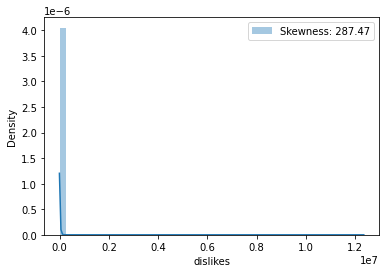

In [ ]:
# plot the histogram of the dislikes column
t=sns.distplot(df['dislikes'],label="Skewness: %.2f"%(df['dislikes'].skew()) )
t.legend()

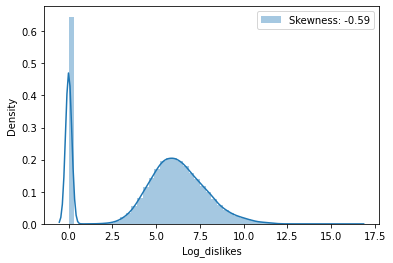

In [ ]:
# handle the skewed by log transform
df['Log_dislikes'] = df['dislikes'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(df['Log_dislikes'],label="Skewness: %.2f"%(df['Log_dislikes'].skew()) )
t.legend()

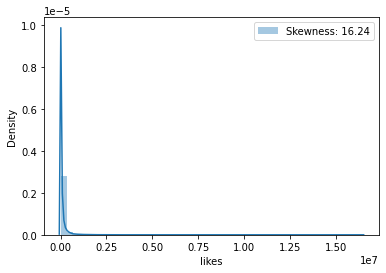

In [ ]:
# plot the histogram of the dislikes column
t=sns.distplot(df['likes'],label="Skewness: %.2f"%(df['likes'].skew()) )
t.legend()

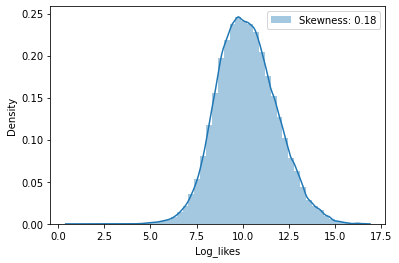

In [ ]:
# handle the skewed by log transform
df['Log_likes'] = df['likes'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(df['Log_likes'],label="Skewness: %.2f"%(df['Log_likes'].skew()) )
t.legend()

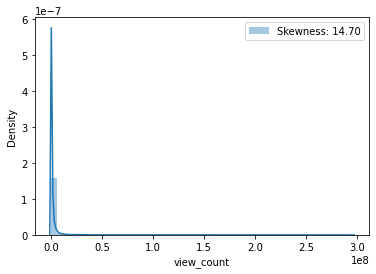

In [ ]:
# plot the histogram of the dislikes column
t=sns.distplot(df['view_count'],label="Skewness: %.2f"%(df['view_count'].skew()) )
t.legend()

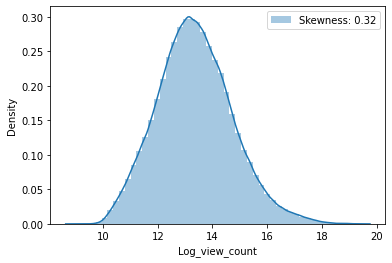

In [ ]:
# handle the skewed by log transform
df['Log_view_count'] = df['view_count'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(df['Log_view_count'],label="Skewness: %.2f"%(df['Log_view_count'].skew()) )
t.legend()

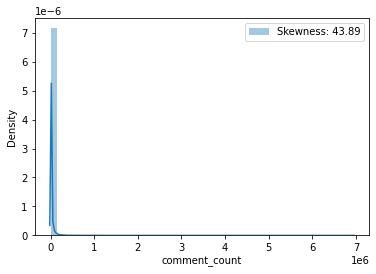

In [ ]:
# plot the histogram of the dislikes column
t=sns.distplot(df['comment_count'],label="Skewness: %.2f"%(df['comment_count'].skew()) )
t.legend()

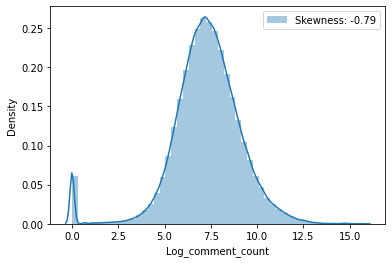

In [ ]:
# handle the skewed by log transform
df['Log_comment_count'] = df['comment_count'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(df['Log_comment_count'],label="Skewness: %.2f"%(df['Log_comment_count'].skew()) )
t.legend()

In [ ]:
#We shoud convert 'comments_disabled' and 'ratings_disabled' from boolean to integer to get into our model

In [ ]:
df["comments_disabled"] = df["comments_disabled"].astype(int)
df["ratings_disabled"] = df["ratings_disabled"].astype(int)


In [ ]:
#converting 'country' and 'category' columns into a numeric form so as to convert them into the machine-readable form.

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['country']= label_encoder.fit_transform(df['country'])
df['category_encoded']= label_encoder.fit_transform(df['category'])

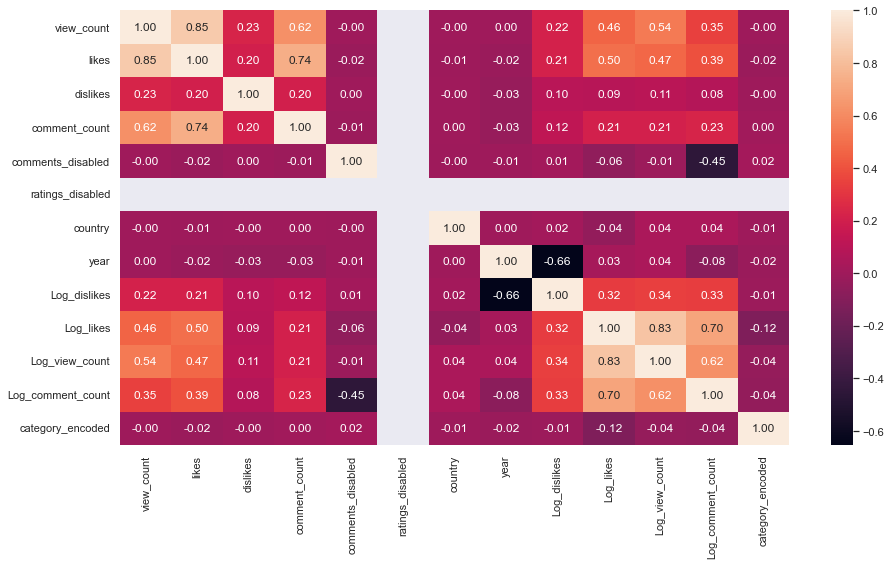

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

### Data preprocessing for second quesion

In [ ]:
df_date = pd.DataFrame()

In [ ]:
df_date['video_id'] = df['video_id']

In [ ]:
df_date['trending_date'] = df['trending_date']

In [ ]:
df_date

,video_id,trending_date
0,s9FH4rDMvds,2020-08-12
1,jbGRowa5tIk,2020-08-12
2,3EfkCrXKZNs,2020-08-12
3,gBjox7vn3-g,2020-08-12
4,npoUGx7UW7o,2020-08-12
...,...,...
124784,22E6bhlZHOA,2022-04-23
124786,FprgxgVuZaE,2022-04-23
124787,mqlAPyWZORQ,2022-04-23
124788,tBdeKWl0E5g,2022-04-23


In [ ]:
df_date.drop_duplicates(subset=['video_id', 'trending_date'], keep='last',inplace=True)

In [ ]:
df_date

,video_id,trending_date
0,s9FH4rDMvds,2020-08-12
2,3EfkCrXKZNs,2020-08-12
3,gBjox7vn3-g,2020-08-12
4,npoUGx7UW7o,2020-08-12
5,Vu6PNpYKu2U,2020-08-12
...,...,...
124784,22E6bhlZHOA,2022-04-23
124786,FprgxgVuZaE,2022-04-23
124787,mqlAPyWZORQ,2022-04-23
124788,tBdeKWl0E5g,2022-04-23


In [ ]:
df_date = df_date.video_id.value_counts()

In [ ]:
df_count =  pd.DataFrame({'Video Id':df_date.index,
                          '# of Days':df_date.values})

In [ ]:
df_count.head(6)

,Video Id,# of Days
0,wY6UyatwVTA,34
1,gdsUKphmB3Y,32
2,vrRfBmMWpLY,30
3,hdmx71UjBXs,30
4,aWzlQ2N6qqg,28
5,aONT7atzqfw,27


In [ ]:
len(df_count)

242003

In [ ]:
df.video_id.value_counts()

2IkoKhr6Tss    138
XA2YEHn-A8Q    120
6-kZmn54vOs    119
3lfnR7OhZY8    116
S2dRcipMCpw    113
              ... 
T5NqVPZClPU      1
i3n6Dh2h4_o      1
YIZn0keFKso      1
0duq8S-TLoc      1
0JR2dhjuUXY      1
Name: video_id, Length: 242003, dtype: int64

In [ ]:
df = df.sort_values(by=['video_id','trending_date'])

In [ ]:
#We will use this DataFrame in the second question
df_count_days = df.drop_duplicates(subset='video_id',keep='first')

In [ ]:
df_count.sort_values('Video Id')

,Video Id,# of Days
67718,--0bCF-iK2E,5
23625,--14w5SOEUs,7
62512,--2O86Z0hsM,5
42946,--2Us2lFR8Y,6
164855,--33vYWLTy8,2
...,...,...
53851,zzoZr-dNlks,6
4628,zztGoiavb5c,10
191673,zzuXBF16ZQg,2
168230,zzx2oiznzyc,2


In [ ]:
df_count_days

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,country,year,category,Log_dislikes,Log_likes,Log_view_count,Log_comment_count,category_encoded
66478,--0bCF-iK2E,Jadon Sancho • Magical Skills & Goals,2021-07-01 10:00:00+00:00,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,17,2021-07-04,football|soccer|fútbol alemán|Bundesliga|seaso...,304339,8753,...,0,Enjoy the best skills and goals from Jadon San...,4,2021,Sports,4.33,9.08,12.63,6.90,13
60749,--14w5SOEUs,Migos - Avalanche,2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-11,Migos|Avalanche|Quality|Control|Music/Motown|R...,1076217,122843,...,0,Music video by Migos performing Avalanche. Qua...,1,2021,Music,6.77,11.72,13.89,9.16,7
116015,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09 23:19:08+00:00,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-11,NaN,466980,16481,...,0,NaN,10,2022,Entertainment,0.00,9.71,13.05,7.15,3
35998,--2Us2lFR8Y,JE CONSTRUIS UNE PIÈCE SECRÈTE DANS MA MAISON,2021-02-11 17:02:05+00:00,UCgl_xdd0kH27vMIZnE-_17w,ALEKS,24,2021-02-12,maison|secret|pièce secrète|secrète|constuire|...,383690,66822,...,0,Après avoir réagis à PLEIN de pièces SECRÈTES ...,3,2021,Entertainment,6.30,11.11,12.86,8.16,3
83065,--33vYWLTy8,ЧТО ЕСЛИ ЗАСУНУТЬ ПАЛЬЦЫ В РОЗЕТКУ?,2021-09-30 15:13:19+00:00,UCSF6ewY9LS8GnbphwvnZpUg,It's Mamix,22,2021-10-01,что если засунуть пальцы в розетку|розетка|эле...,1018607,138992,...,0,★ ПОДПИСЫВАЙТЕСЬ НА КАНАЛ! - https://www.youtu...,9,2021,People & Blogs,7.41,11.84,13.83,8.46,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13620,zzoZr-dNlks,【アニメ】ひよこの育て方【電子レンジ】,2020-10-18 09:00:18+00:00,UCJFZiqLMntJufDCHc6bQixg,hololive ホロライブ - VTuber Group,24,2020-10-19,hololive|ホロライブ|VTuber|バーチャルYouTuber|VR|白上フブキ|湊...,437271,33352,...,0,本日の夕飯はオムライスで決まり！感想はコメントか #ホロぐら でツイート！▶︎ホロのぐらふぃ...,6,2020,Entertainment,5.23,10.41,12.99,7.71,3
86360,zztGoiavb5c,오디오 빵빵 터진 YGX 지목 토크! “제가 꼽은 스우파 명장면은요…”ㅣVOGUE ...,2021-10-26 14:00:34+00:00,UC2DHU9RPlx9DpY0pMfL7jBg,VOGUE KOREA,24,2021-10-27,와이지엑스|ygx|리정|예리|이삭|여진|지효|blackpink|ygx 제시|인터뷰,186417,6707,...,0,#VogueMeets #YGXYGX와 지목 토크를 해보았습니다🔥 YGX의 연애 고수...,7,2021,Entertainment,3.33,8.81,12.14,6.30,3
9821,zzuXBF16ZQg,Düşmən qruplaşması mühasirəyə alındı - RƏSMİ,2020-09-30 08:34:47+00:00,UCiNdMWXMS7zjvm0QApujZbg,Mir TV,22,2020-09-30,NaN,25210,794,...,0,Cəbhənin Ağdərə-Tərtər istiqamətində mühasirəy...,9,2020,People & Blogs,2.64,6.68,10.13,3.93,10
66746,zzx2oiznzyc,"СИЛЬНАЯ МЕЛОДРАМА! Оставшись без мужа, она нач...",2021-07-10 15:29:28+00:00,UCHrtYOIWys7Hbq-UFpaFJ9A,Серіали України,1,2021-07-11,сериал|фильм|кино|смотреть|онлайн|все серии|по...,112291,862,...,0,Жизнь Анны смело можно назвать успешной – у не...,9,2021,Film & Animation,4.62,6.76,11.63,4.38,4


In [ ]:
df_count_days = pd.merge(df_count_days,df_count,left_on='video_id',right_on='Video Id')

## Hypothesis Test

Hypothesis: Videos that are in the Entertainment category has significantly higher number of views in average comparing to videos in non-entertainment categories.

Null hypothesis: There is no difference between the average of number of views in videos that are in the Entertainment category, and the the average of number of views in videos that are not in the Entertainment category.

Alternative hypothesis: There is difference between the average of number of views in videos that are in the Entertainment category, and the the average of number of views in videos that are not in the Entertainment category.

In [ ]:
import scipy.stats as stats

In [ ]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country', 'year', 'category',
       'Log_dislikes', 'Log_likes', 'Log_view_count', 'Log_comment_count',
       'category_encoded'],
      dtype='object')

In [ ]:
df['category'].value_counts()

Entertainment            308158
Music                    182521
People & Blogs           142244
Gaming                   136584
Sports                   116769
Comedy                    71535
News & Politics           48554
Howto & Style             38437
Film & Animation          36004
Science & Technology      29477
Autos & Vehicles          25894
Education                 22297
Travel & Events            7362
Pets & Animals             6490
Nonprofits & Activism        89
Name: category, dtype: int64

<AxesSubplot:title={'center':'Distribution of views count for Entertainment'}>

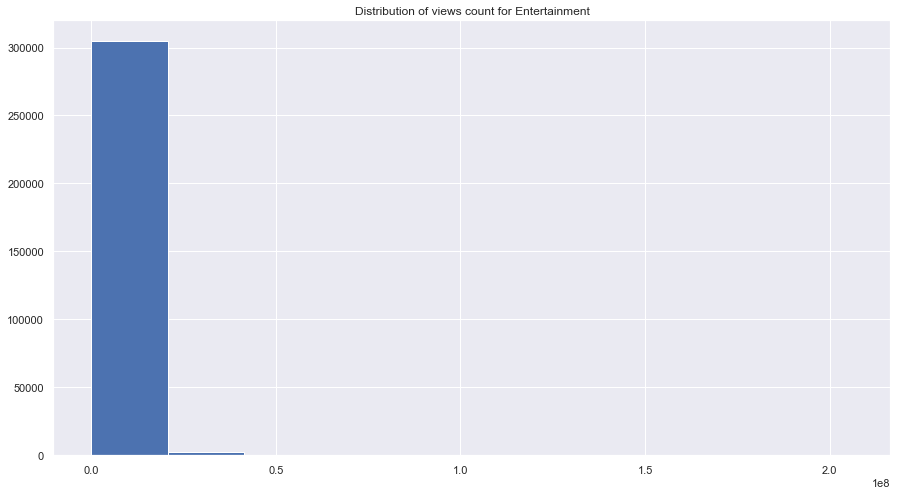

In [ ]:
plt.title('Distribution of views count for Entertainment')
df[df['category'] == 'Entertainment']['view_count'].hist()

<AxesSubplot:title={'center':'Distribution of views count for other categories'}>

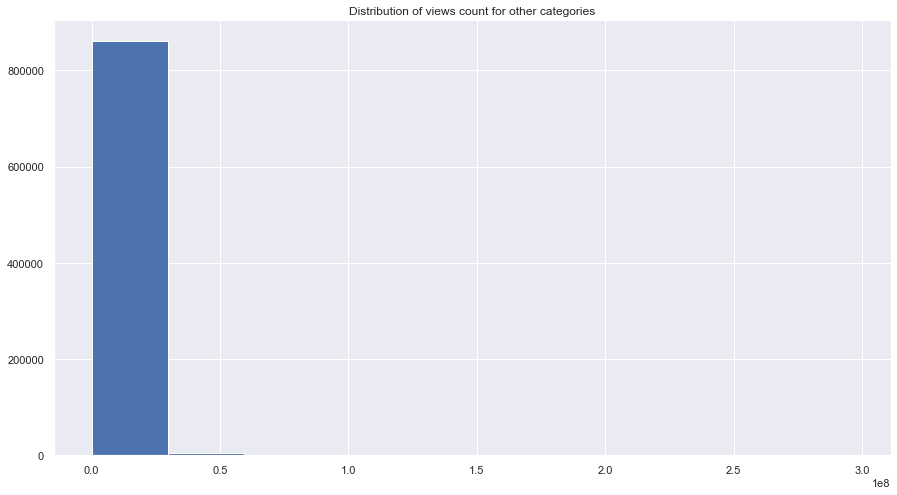

In [ ]:
plt.title('Distribution of views count for other categories')
df[df['category'] != 'Entertainment']['view_count'].hist()

In [ ]:
df[df['category'] != 'Entertainment']['view_count'].var()

38681030396723.22

In [ ]:
df[df['category'] == 'Entertainment']

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,country,year,category,Log_dislikes,Log_likes,Log_view_count,Log_comment_count,category_encoded
116015,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09 23:19:08+00:00,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-11,NaN,466980,16481,...,0,NaN,10,2022,Entertainment,0.00,9.71,13.05,7.15,3
116431,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09 23:19:08+00:00,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-13,NaN,506401,16829,...,0,NaN,1,2022,Entertainment,0.00,9.73,13.14,7.27,3
116480,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09 23:19:08+00:00,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-13,NaN,506401,16829,...,0,NaN,10,2022,Entertainment,0.00,9.73,13.14,7.27,3
116631,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09 23:19:08+00:00,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-14,NaN,519009,16978,...,0,NaN,1,2022,Entertainment,0.00,9.74,13.16,7.22,3
116719,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09 23:19:08+00:00,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-14,NaN,519009,16978,...,0,NaN,10,2022,Entertainment,0.00,9.74,13.16,7.22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87869,zztGoiavb5c,오디오 빵빵 터진 YGX 지목 토크! “제가 꼽은 스우파 명장면은요…”ㅣVOGUE ...,2021-10-26 14:00:34+00:00,UC2DHU9RPlx9DpY0pMfL7jBg,VOGUE KOREA,24,2021-11-03,와이지엑스|ygx|리정|예리|이삭|여진|지효|blackpink|ygx 제시|인터뷰,665137,19805,...,0,#VogueMeets #YGXYGX와 지목 토크를 해보았습니다🔥 YGX의 연애 고수...,7,2021,Entertainment,4.74,9.89,13.41,6.95,3
88091,zztGoiavb5c,오디오 빵빵 터진 YGX 지목 토크! “제가 꼽은 스우파 명장면은요…”ㅣVOGUE ...,2021-10-26 14:00:34+00:00,UC2DHU9RPlx9DpY0pMfL7jBg,VOGUE KOREA,24,2021-11-04,와이지엑스|ygx|리정|예리|이삭|여진|지효|blackpink|ygx 제시|인터뷰,686723,20394,...,0,#VogueMeets #YGXYGX와 지목 토크를 해보았습니다🔥 YGX의 연애 고수...,7,2021,Entertainment,4.76,9.92,13.44,6.96,3
88298,zztGoiavb5c,오디오 빵빵 터진 YGX 지목 토크! “제가 꼽은 스우파 명장면은요…”ㅣVOGUE ...,2021-10-26 14:00:34+00:00,UC2DHU9RPlx9DpY0pMfL7jBg,VOGUE KOREA,24,2021-11-05,와이지엑스|ygx|리정|예리|이삭|여진|지효|blackpink|ygx 제시|인터뷰,702188,20833,...,0,#VogueMeets #YGXYGX와 지목 토크를 해보았습니다🔥 YGX의 연애 고수...,7,2021,Entertainment,4.79,9.94,13.46,6.97,3
88515,zztGoiavb5c,오디오 빵빵 터진 YGX 지목 토크! “제가 꼽은 스우파 명장면은요…”ㅣVOGUE ...,2021-10-26 14:00:34+00:00,UC2DHU9RPlx9DpY0pMfL7jBg,VOGUE KOREA,24,2021-11-06,와이지엑스|ygx|리정|예리|이삭|여진|지효|blackpink|ygx 제시|인터뷰,714626,21201,...,0,#VogueMeets #YGXYGX와 지목 토크를 해보았습니다🔥 YGX의 연애 고수...,7,2021,Entertainment,4.82,9.96,13.48,6.98,3


In [ ]:
views_entertainment = df[df['category'] == 'Entertainment']['view_count']
views_not_entertainment  = df[df['category'] != 'Entertainment']['view_count']
statstic, pvalue = stats.mannwhitneyu(views_entertainment, views_not_entertainment)
print("p_value: ",pvalue)

if pvalue < 0.05:
    print('\nReject null hypothesis and accept that it is an alternative hypothesis')
else:
    print('\nAccept null hypothesis')

p_value:  6.382008625455814e-208

Reject null hypothesis and accept that it is an alternative hypothesis


## Question 1 (regression question) : What is the number of views of a video on trending list?

In [ ]:
from numpy import mean
from sklearn.metrics import r2_score,mean_squared_log_error
from numpy import std
from sklearn.pipeline import Pipeline
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.feature_selection import RFE

In [ ]:
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,country,year,category,Log_dislikes,Log_likes,Log_view_count,Log_comment_count,category_encoded
66478,--0bCF-iK2E,Jadon Sancho • Magical Skills & Goals,2021-07-01 10:00:00+00:00,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,17,2021-07-04,football|soccer|fútbol alemán|Bundesliga|seaso...,304339,8753,...,0,Enjoy the best skills and goals from Jadon San...,4,2021,Sports,4.33,9.08,12.63,6.90,13
66705,--0bCF-iK2E,Jadon Sancho • Magical Skills & Goals,2021-07-01 10:00:00+00:00,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,17,2021-07-05,football|soccer|fútbol alemán|Bundesliga|seaso...,361948,10020,...,0,Enjoy the best skills and goals from Jadon San...,4,2021,Sports,4.53,9.21,12.80,6.95,13
66939,--0bCF-iK2E,Jadon Sancho • Magical Skills & Goals,2021-07-01 10:00:00+00:00,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,17,2021-07-06,football|soccer|fútbol alemán|Bundesliga|seaso...,398274,10750,...,0,Enjoy the best skills and goals from Jadon San...,4,2021,Sports,4.61,9.28,12.89,6.97,13
67174,--0bCF-iK2E,Jadon Sancho • Magical Skills & Goals,2021-07-01 10:00:00+00:00,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,17,2021-07-07,football|soccer|fútbol alemán|Bundesliga|seaso...,419194,11108,...,0,Enjoy the best skills and goals from Jadon San...,4,2021,Sports,4.66,9.32,12.95,6.98,13
67393,--0bCF-iK2E,Jadon Sancho • Magical Skills & Goals,2021-07-01 10:00:00+00:00,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,17,2021-07-08,football|soccer|fútbol alemán|Bundesliga|seaso...,433340,11276,...,0,Enjoy the best skills and goals from Jadon San...,4,2021,Sports,4.70,9.33,12.98,6.99,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,zzuXBF16ZQg,Düşmən qruplaşması mühasirəyə alındı - RƏSMİ,2020-09-30 08:34:47+00:00,UCiNdMWXMS7zjvm0QApujZbg,Mir TV,22,2020-09-30,NaN,25210,794,...,0,Cəbhənin Ağdərə-Tərtər istiqamətində mühasirəy...,9,2020,People & Blogs,2.64,6.68,10.13,3.93,10
10126,zzuXBF16ZQg,Düşmən qruplaşması mühasirəyə alındı - RƏSMİ,2020-09-30 08:34:47+00:00,UCiNdMWXMS7zjvm0QApujZbg,Mir TV,22,2020-10-01,NaN,35253,853,...,0,Cəbhənin Ağdərə-Tərtər istiqamətində mühasirəy...,9,2020,People & Blogs,3.87,6.75,10.47,4.39,10
66746,zzx2oiznzyc,"СИЛЬНАЯ МЕЛОДРАМА! Оставшись без мужа, она нач...",2021-07-10 15:29:28+00:00,UCHrtYOIWys7Hbq-UFpaFJ9A,Серіали України,1,2021-07-11,сериал|фильм|кино|смотреть|онлайн|все серии|по...,112291,862,...,0,Жизнь Анны смело можно назвать успешной – у не...,9,2021,Film & Animation,4.62,6.76,11.63,4.38,4
67007,zzx2oiznzyc,"СИЛЬНАЯ МЕЛОДРАМА! Оставшись без мужа, она нач...",2021-07-10 15:29:28+00:00,UCHrtYOIWys7Hbq-UFpaFJ9A,Серіали України,1,2021-07-12,сериал|фильм|кино|смотреть|онлайн|все серии|по...,291157,1687,...,0,Жизнь Анны смело можно назвать успешной – у не...,9,2021,Film & Animation,5.47,7.43,12.58,5.06,4


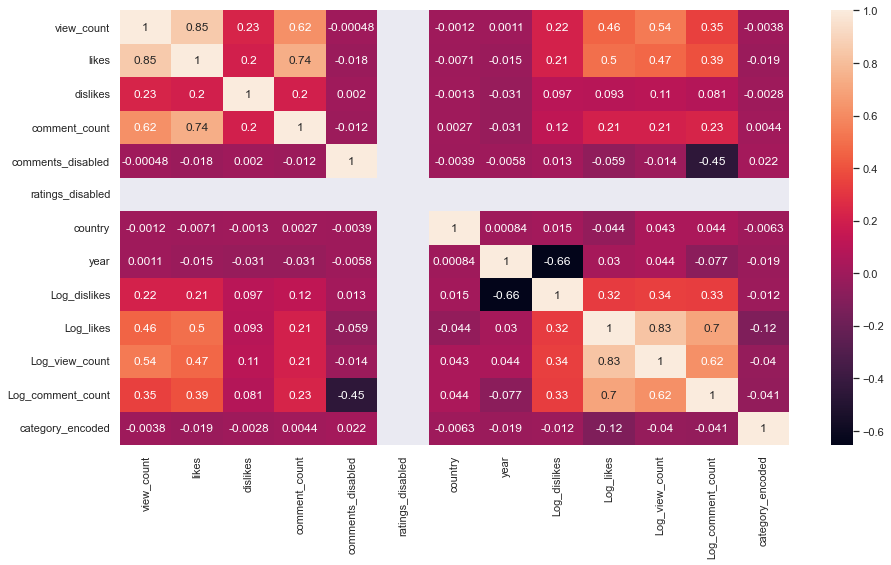

In [ ]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df_v= pd.DataFrame()
df_v['Log_view_count']=df['Log_view_count']
df_v['Log_likes']=df['Log_likes']
df_v['Log_dislikes']=df['Log_dislikes']
df_v['comments_disabled']=df['comments_disabled']
df_v['year']=df['year']
df_v['Log_comment_count']=df['Log_comment_count']
df_v['ratings_disabled']=df['ratings_disabled']
d = scaler.fit_transform(df_v)
scaled_df = pd.DataFrame(d,columns=['Log_view_count','Log_likes','Log_dislikes','comments_disabled','year','Log_comment_count','ratings_disabled'])

In [ ]:
scaled_df

,Log_view_count,Log_likes,Log_dislikes,comments_disabled,year,Log_comment_count,ratings_disabled
0,0.35,0.53,0.27,0.00,0.50,0.44,0.00
1,0.37,0.54,0.28,0.00,0.50,0.44,0.00
2,0.38,0.54,0.28,0.00,0.50,0.44,0.00
3,0.38,0.54,0.29,0.00,0.50,0.44,0.00
4,0.39,0.54,0.29,0.00,0.50,0.44,0.00
...,...,...,...,...,...,...,...
1175446,0.12,0.38,0.16,0.00,0.00,0.25,0.00
1175447,0.15,0.38,0.24,0.00,0.00,0.28,0.00
1175448,0.26,0.38,0.28,0.00,0.50,0.28,0.00
1175449,0.35,0.42,0.33,0.00,0.50,0.32,0.00


## model 1 :linear regression with RFE

In [ ]:
# define dataset
from sklearn.metrics import r2_score
x=df_v.drop('Log_view_count', axis=1)
y= df_v['Log_view_count']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
# create pipeline
rfe = RFE(estimator=LinearRegression(), n_features_to_select=4)
model = LinearRegression()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(x_train,y_train)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# make a prediction
y_predict = pipeline.predict(x_test)
result=r2_score(y_test,y_predict)
print(result)
for i in range(x_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

0.7021717557367244
Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 2.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 4.000


## linear regression without RFE

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df_vi= pd.DataFrame()
df_vi['Log_view_count']=df['Log_view_count']
df_vi['Log_likes']=df['Log_likes']
df_vi['Log_dislikes']=df['dislikes']
df_vi['Log_comment_count']=df['Log_comment_count']
di = scaler.fit_transform(df_vi)
scaled_dfo = pd.DataFrame(di,columns=['view_count','likes','dislikes','comment_count'])

In [ ]:
# define dataset
from sklearn.metrics import r2_score
x=df_vi.drop('Log_view_count', axis=1)
y= df_vi['Log_view_count']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
# create model
model = LinearRegression()
# fit the model on all available data
model.fit(x_train,y_train)
# make a prediction
y_predict = pipeline.predict(x_test)
result=r2_score(y_test,y_predict)
print(result)

0.6946218866563283
Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000


## model 2 :XGB with RFE

In [ ]:
# define dataset
from sklearn.metrics import r2_score,mean_squared_log_error
x=scaled_df.drop('Log_view_count', axis=1)
y= scaled_df['Log_view_count']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
# create pipeline
rfe = RFE(estimator=XGBRegressor(), n_features_to_select=3)
model = XGBRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(x_train,y_train)
# make a prediction
y_predict = pipeline.predict(x_test)
result=r2_score(y_test,y_predict)
print(result)
for i in range(x_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

0.7896931068915827
Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 3.000
Column: 3, Selected False, Rank: 2.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 4.000


## XGB with RFE

0.7917022691308369
0.0018156913132167983


<AxesSubplot:xlabel='Log_view_count'>

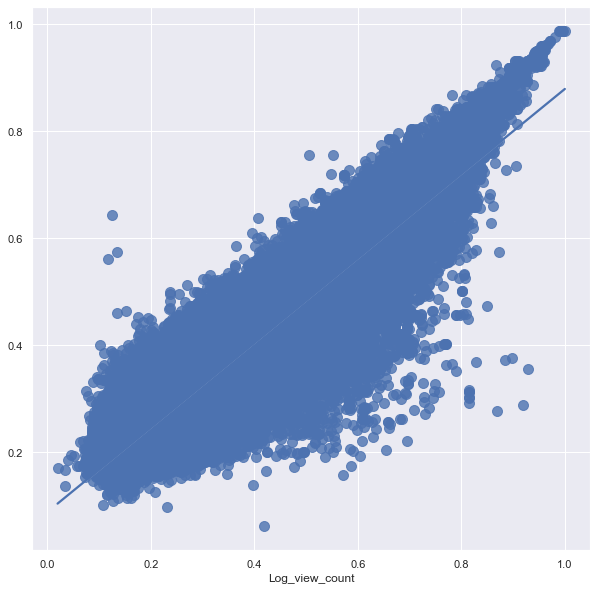

In [ ]:
# create an xgboost regression model
xgb_r = XGBRegressor()

# Fitting the model
xgb_r.fit(x_train, y_train)

# Predict the model
pred = xgb_r.predict(x_test)


print(r2_score(y_test, pred))
print(mean_squared_log_error(y_test, pred))

plt.figure(figsize=(10,10))
sns.regplot(y_test, pred, fit_reg=True, scatter_kws={"s": 100})

In [ ]:
df_vie= pd.DataFrame()
df_vie['view_count']=df['Log_view_count']
df_vie['likes']=df['Log_likes']
df_vie['dislikes']=df['Log_dislikes']
df_vie['comment_count']=df['Log_comment_count']

In [ ]:
# define dataset
from sklearn.metrics import r2_score
x=df_vie.drop('view_count', axis=1)
y= df_vie['view_count']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
# create pipeline
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
model = LinearRegression()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(x_train,y_train)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# make a prediction
from sklearn.metrics import mean_squared_error
y_predict = pipeline.predict(x_test)
result=r2_score(y_test,y_predict)
result1=mean_squared_error(y_test,y_predict)

print(result)
print(result1)
for i in range(x_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

0.6991521965401613
0.5707075127536202
Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000


## Regression Question
## Predicting the number of trending days in the future for first-time-trending videos

#### Reference:
- https://www.kaggle.com/code/jgolani2/eda-and-ml-insights-on-youtube-trending-dataset
- https://subscription.packtpub.com/book/data/9781789808452/1/ch01lvl1sec12/computing-regression-accuracy
- https://www.geeksforgeeks.org/random-forest-regression-in-python/
- https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/
- https://www.section.io/engineering-education/support-vector-regression-in-python/

### first for every 'video_id','trending_date' extract the max  'view_count' , 'likes', 'dislikes'  and  'comment_count'

In [ ]:
the_data= df.groupby(['video_id','trending_date','publishedAt'],as_index=False).agg({'view_count':\
                                                             'max','likes':'max','dislikes':'max','comment_count':'max'})

### check the values to see all the days a video was trending

In [ ]:
the_data[the_data.video_id=='s9FH4rDMvds']

In [ ]:
data_1 = the_data.copy()
data_1.info()

### every video trends for multiple days so i will create new feature : trending_day_no
### this feature will give us the current trending day number for each record
### adding this feature will help in retaining the metrics like  'likes','dislikes'and 'comment_count' for every trending day number to use it to predict how many more days a video can trend

In [ ]:
data_1['trending_day_no'] = data_1.groupby(['video_id'])["trending_date"].rank('first',ascending=True)
# finding total trending days for every video
data_1_count = data_1.groupby('video_id',as_index=False)["trending_date"].count().rename(columns={\
                                                                'trending_date':'total_trending_days'})

In [ ]:
data_2 = data_1.merge(data_1_count, left_on='video_id', right_on='video_id')
data_2.head()

In [ ]:
df_count_days.corr()

### check the data for specific video_id

In [ ]:
data_2[data_2['video_id'] == 's9FH4rDMvds']

In [ ]:
df_count_days['published_year'] = df_count_days.publishedAt.dt.year
df_count_days['published_month'] = df_count_days.publishedAt.dt.month
df_count_days['published_day'] = df_count_days.publishedAt.dt.day
df_count_days['published_hour'] = df_count_days.publishedAt.dt.hour
df_count_days['published_minute'] = df_count_days.publishedAt.dt.minute
df_count_days['published_week'] = df_count_days.publishedAt.dt.week

In [ ]:
df_count_days.drop(columns=[ 'trending_date', 'publishedAt'],inplace=True)

* i want to  predict the number of trending days in the future for first-time-trending videos
* all of our videos are first time trending because  the video is published only one time and goes trending for some days  so i will keep the first video_id and drop duplicates so that trending_day_no is 1 and the model gets the information from the first time trending video (the first day a video goes trending and the model will predict  how many days the video will remain trending )

In [ ]:
df_count_days[df_count_days['video_id'] == 's9FH4rDMvds']

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_count_days = df_count_days.drop(['video_id','title','channelId','channelTitle','categoryId','tags','description','thumbnail_link'],axis=1)

In [ ]:
df_count_days = df_count_days.drop(['thumbnail_link'],axis=1)

In [ ]:
df_count_days.columns

In [ ]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df_count_days.info()

In [ ]:
inpt = df_count_days.drop('total_trending_days',axis=1)
out = data_2.total_trending_days

In [ ]:
inpt.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler # scale the data
scale = StandardScaler()
inpt= scale.fit_transform(inpt)

In [ ]:
from sklearn.model_selection import train_test_split  # splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(inpt,out,
                            test_size=0.3,random_state=0)

### our data is ready for the model

 ### LinearRegression Model

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

In [ ]:
y_pred =model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn import metrics
print("training score",model.score(X_train,Y_train))
print("testscore",model.score(X_test,Y_test))

In [ ]:
import sklearn.metrics as sm
print(" the mean absolute error is ", round(sm.mean_absolute_error(Y_test, y_pred), 2))
print("the mean squared error =", round(sm.mean_squared_error(Y_test, y_pred), 2))
print("the median absolute error =", round(sm.median_absolute_error(Y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(Y_test, y_pred), 2))
print("R2 score is ", round(sm.r2_score(Y_test, y_pred), 2))

### Decision Tree Regressor Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state = 0)
reg.fit(X_train,Y_train)

In [ ]:
y_hat = reg.predict(X_test)

In [ ]:
y_hat

In [ ]:
from sklearn import metrics
print("training score",reg.score(X_train,Y_train))
print("testscore",reg.score(X_test,Y_test))

In [ ]:
import sklearn.metrics as sm
print(" the mean absolute error is ", round(sm.mean_absolute_error(Y_test, y_hat), 2))
print("the mean squared error =", round(sm.mean_squared_error(Y_test, y_hat), 2))
print("the median absolute error =", round(sm.median_absolute_error(Y_test, y_hat), 2))
print("Explain variance score =", round(sm.explained_variance_score(Y_test, y_hat), 2))
print("R2 score is ", round(sm.r2_score(Y_test, y_hat), 2))

### RandomForestRegressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state = 0)


regr.fit(X_train,Y_train)

In [ ]:
Y_predict = regr.predict(X_test)

In [ ]:
Y_predict

In [ ]:
from sklearn import metrics
print("training score",regr.score(X_train,Y_train))
print("testscore",regr.score(X_test,Y_test))

In [ ]:
import sklearn.metrics as sm
print(" the mean absolute error is ", round(sm.mean_absolute_error(Y_test, Y_predict), 2))
print("the mean squared error =", round(sm.mean_squared_error(Y_test, Y_predict), 2))
print("the median absolute error =", round(sm.median_absolute_error(Y_test, Y_predict), 2))
print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_predict), 2))
print("R2 score is ", round(sm.r2_score(Y_test, Y_predict), 2))

### Support Vector Regression Model

In [ ]:

from sklearn.svm import SVR

svr_model = SVR()

svr_model.fit(X_train,Y_train)

In [ ]:
predicting_y=svr_model.predict(X_test)
predicting_y

In [ ]:
from sklearn import metrics
print("training score",svr_model.score(X_train,Y_train))
print("testscore",svr_model.score(X_test,Y_test))

In [ ]:
import sklearn.metrics as sm
print(" the mean absolute error is ", round(sm.mean_absolute_error(Y_test, predicting_y), 2))
print("the mean squared error =", round(sm.mean_squared_error(Y_test, predicting_y), 2))
print("the median absolute error =", round(sm.median_absolute_error(Y_test, predicting_y), 2))
print("Explain variance score =", round(sm.explained_variance_score(Y_test, predicting_y), 2))
print("R2 score is ", round(sm.r2_score(Y_test, predicting_y), 2))

## finding :
- Comparing all the results  it’s safe to say the RandomForestRegressor Model did the best for answering the question as it has the least mean absolute error = 1.7 and the least mean squared error = 4.75  and also the least median absolute error = 1.42   notice also it has higher value of both Explain variance score = 0.33 and R2 score is  0.33
